# Seed Jupyter notebook to read and manipulate data with pandas and NumPy

A seed Jupyter Python notebook to read, manipulate and visualize data. This notebooks is a skeleton for those steps, with simple sample code that can be expanded later.

It covers:

* Read data from an external file
* Manipulate the data
  * Create new columns based on the values of columns in the file
* Filter data based on column values
* Visualize data in a graph

## Read 

Read from a .csv file, parsing dates

In [1]:
import pandas as pd

df = pd.read_csv('employees.csv', parse_dates=['hire date'], skipinitialspace=True)
df

,first name,last name,hire date,salary,education level
0,Albert,Einstein,1998-01-01,8000,PhD
1,Blaise,Pascal,1999-02-02,6000,BS
2,Edmond,Halley,2000-03-03,5800,High school
3,Enrico,Fermi,2000-04-04,5600,MsC
4,Marie,Curi,2001-05-05,7200,PhD
5,Max,Planck,2001-06-06,4900,High school
6,Nicolaus,Copernicus,2002-07-07,5100,BS
7,Niels,Bohr,2002-08-08,5400,MsC
8,Richard,Feynman,2002-09-09,7800,PhD
9,Isaac,Newton,2003-10-10,7100,BS


## Add columns

Add a new column, based on values of another column

### NumPy np.where

In [2]:
import numpy as np

df['high salary np.where'] = np.where(df['salary'] >= 7000, 'yes', 'no')
df

,first name,last name,hire date,salary,education level,high salary np.where
0,Albert,Einstein,1998-01-01,8000,PhD,yes
1,Blaise,Pascal,1999-02-02,6000,BS,no
2,Edmond,Halley,2000-03-03,5800,High school,no
3,Enrico,Fermi,2000-04-04,5600,MsC,no
4,Marie,Curi,2001-05-05,7200,PhD,yes
5,Max,Planck,2001-06-06,4900,High school,no
6,Nicolaus,Copernicus,2002-07-07,5100,BS,no
7,Niels,Bohr,2002-08-08,5400,MsC,no
8,Richard,Feynman,2002-09-09,7800,PhD,yes
9,Isaac,Newton,2003-10-10,7100,BS,yes


### List comprehension

Add the column again, this time using list comprehension

In [3]:
df['high salary list comprehension'] = ['yes' if x >= 7000 else 'no' for x in df['salary']]
df

,first name,last name,hire date,salary,education level,high salary np.where,high salary list comprehension
0,Albert,Einstein,1998-01-01,8000,PhD,yes,yes
1,Blaise,Pascal,1999-02-02,6000,BS,no,no
2,Edmond,Halley,2000-03-03,5800,High school,no,no
3,Enrico,Fermi,2000-04-04,5600,MsC,no,no
4,Marie,Curi,2001-05-05,7200,PhD,yes,yes
5,Max,Planck,2001-06-06,4900,High school,no,no
6,Nicolaus,Copernicus,2002-07-07,5100,BS,no,no
7,Niels,Bohr,2002-08-08,5400,MsC,no,no
8,Richard,Feynman,2002-09-09,7800,PhD,yes,yes
9,Isaac,Newton,2003-10-10,7100,BS,yes,yes


### Vectorized operation with `isin()`

In [4]:
high_salary = df['salary'] >= 7000
low_salary = df['salary'] < 7000

df.loc[high_salary, 'high salary isin'] = 'yes'
df.loc[low_salary, 'high salary isin'] = 'no'
df

,first name,last name,hire date,salary,education level,high salary np.where,high salary list comprehension,high salary isin
0,Albert,Einstein,1998-01-01,8000,PhD,yes,yes,yes
1,Blaise,Pascal,1999-02-02,6000,BS,no,no,no
2,Edmond,Halley,2000-03-03,5800,High school,no,no,no
3,Enrico,Fermi,2000-04-04,5600,MsC,no,no,no
4,Marie,Curi,2001-05-05,7200,PhD,yes,yes,yes
5,Max,Planck,2001-06-06,4900,High school,no,no,no
6,Nicolaus,Copernicus,2002-07-07,5100,BS,no,no,no
7,Niels,Bohr,2002-08-08,5400,MsC,no,no,no
8,Richard,Feynman,2002-09-09,7800,PhD,yes,yes,yes
9,Isaac,Newton,2003-10-10,7100,BS,yes,yes,yes


### `apply()` with a function

Use a function to add a new column with a calculated value. A function is useful when the calculation is complex, not suitable for list comprehension or lambda expressions.

In [5]:
import datetime

def vacation_days(hire_date):
    today = pd.to_datetime('today')
    service_years = (today - hire_date) / np.timedelta64(1, 'Y')
    if service_years >= 20:
        return 25
    if service_years >= 15:
        return 20
    return 10

df['vacation days'] = df['hire date'].apply(vacation_days)
df

,first name,last name,hire date,salary,education level,high salary np.where,high salary list comprehension,high salary isin,vacation days
0,Albert,Einstein,1998-01-01,8000,PhD,yes,yes,yes,25
1,Blaise,Pascal,1999-02-02,6000,BS,no,no,no,25
2,Edmond,Halley,2000-03-03,5800,High school,no,no,no,20
3,Enrico,Fermi,2000-04-04,5600,MsC,no,no,no,20
4,Marie,Curi,2001-05-05,7200,PhD,yes,yes,yes,20
5,Max,Planck,2001-06-06,4900,High school,no,no,no,20
6,Nicolaus,Copernicus,2002-07-07,5100,BS,no,no,no,20
7,Niels,Bohr,2002-08-08,5400,MsC,no,no,no,20
8,Richard,Feynman,2002-09-09,7800,PhD,yes,yes,yes,20
9,Isaac,Newton,2003-10-10,7100,BS,yes,yes,yes,20


### Which method to use

Which method to use: [this StackOverflow question](https://stackoverflow.com/q/50375985/336802) says that the `numpy` method is faster for large dataset.

[This article](https://realpython.com/fast-flexible-pandas/) has a detailed, step-by-step case study of performance improvement. The important concept covered in the article is _vectorized operations_.

## Filter

Filter data based on column value

About the usage of `.loc` here: see a quick explanation in [this SO answer](https://stackoverflow.com/a/48411543) and a much more detailed explanation in the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html#selection-by-label).

In [6]:
df_high = df.loc[df['high salary np.where'] == 'yes']
df_high

,first name,last name,hire date,salary,education level,high salary np.where,high salary list comprehension,high salary isin,vacation days
0,Albert,Einstein,1998-01-01,8000,PhD,yes,yes,yes,25
4,Marie,Curi,2001-05-05,7200,PhD,yes,yes,yes,20
8,Richard,Feynman,2002-09-09,7800,PhD,yes,yes,yes,20
9,Isaac,Newton,2003-10-10,7100,BS,yes,yes,yes,20
10,Stephen,Hawking,2004-11-11,7400,PhD,yes,yes,yes,10


## Graphs

**NOTE**: pandas uses [matlibplot](https://matplotlib.org/) under the hood for graphs. Pandas' `plot` is a wrapper for the matlibplot APIs, simplifying its usage. You can also invoke the matlibpot APIs directly for more advanced graphing creation and customization. See details in [this pandas document](http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html). 

Simple graphs, choosing specific columns for each axis.

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

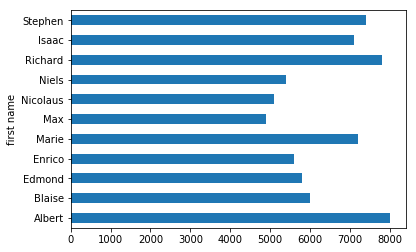

In [8]:
df.plot(x='first name', y='salary', kind='barh', legend=False)

Choosing colors for the bars, based on the value of another column.

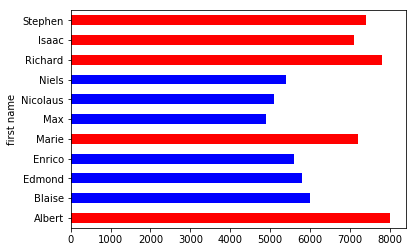

In [20]:
df.plot(x='first name', y='salary', kind='barh', legend=False, 
        color=np.where(df['high salary np.where'] == 'yes', 'r', 'b'))


Same as the above, using list comprehension for the colors.

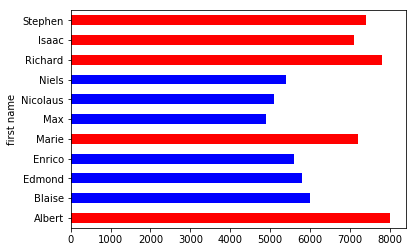

In [10]:
df.plot(x='first name', y='salary', kind='barh', legend=False, 
        color=['r' if x == 'yes' else 'b' for x in df['high salary np.where']])


### Using categorical data in graphs

Using categorical data for plotting in pandas can get a bit complicated, even if all we want is to use it for color coding (see [this SO question](https://stackoverflow.com/q/21654635/336802)). For those cases [seaborn](https://seaborn.pydata.org/index.html) is a better alternative.

In the example below we are trying to find out if there is a relationship between tenure (years of service) or education level with salary. Using education level as color shows that salary is correlated with education level, but has some outliers (a highly-payed BS student and a high school graduate making more than all MsC employees).

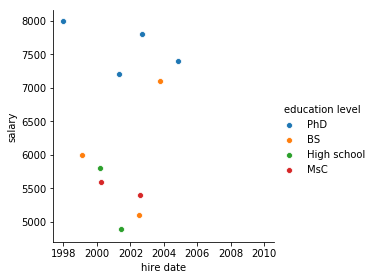

In [19]:
import seaborn as sns

sns.pairplot(x_vars=['hire date'], y_vars=['salary'], data=df, hue='education level', height=4)

There are other data visualizaton libraries for Python. See [this article](https://blog.modeanalytics.com/python-data-visualization-libraries/), [this other article](http://pbpython.com/visualization-tools-1.html) and [this one](https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/) that includes code in the comparison. But note that libraries move fast, especially the new ones. Always check for changes with a generic google "python data visualization".

If you are also working with R: `ggplot2` is available in Python (where it's called `ggplot` - see [here](http://ggplot.yhathq.com/)).
